# Chuẩn hóa dữ liệu và Xử lý giá trị ngoại lai

In [1]:
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('updated_data.csv', encoding='utf-8-sig')

In [3]:
# Kiểm tra kích thước dữ liệu
print(data.shape)

(10544, 23)


In [4]:
# Kiểm tra tên các cột của dữ liệu
print(data.columns)

Index(['name', 'brand', 'color', 'condition', 'price_old', 'price_new',
       'image', 'warranty', 'CPU', 'RAM', 'capacity', 'time', 'battery',
       'screen_size', 'operating_system', 'display_technology',
       'screen_resolution', 'SIM', 'size', 'weight', 'bluetooth',
       'refresh_rate', 'GPU'],
      dtype='object')


### Xử lí price_old, price_new

In [5]:
# Chuyển đổi cột 'price_old' từ object sang Int64, giữ nguyên NaN
data['price_old'] = data['price_old'].astype(str).str.replace('.', '', regex=False)
data['price_old'] = data['price_old'].str.replace('₫', '', regex=False)
data['price_old'] = data['price_old'].str.replace('đ', '', regex=False)
data['price_old'] = pd.to_numeric(data['price_old'], errors='coerce').astype('Int64')

# Chuyển đổi cột 'price_new' từ object sang Int64, giữ nguyên NaN
data['price_new'] = data['price_new'].astype(str).str.replace('.', '', regex=False)
data['price_new'] = data['price_new'].str.replace('₫', '', regex=False)
data['price_new'] = data['price_new'].str.replace('đ', '', regex=False)
data['price_new'] = pd.to_numeric(data['price_new'], errors='coerce').astype('Int64')

### Xử lí cột color và image

In [6]:
print(data['color'].unique())

["['Bạc', 'Tím', 'Đen', 'Vàng']"
 "['Bạc', 'Xám', 'Xanh dương', 'Vàng', 'Xanh lá']"
 "['Bạc', 'Đen', 'Vàng', 'Tím']" "['Tím', 'Đen', 'Vàng', 'Xám']"
 "['Xanh dương', 'Tím', 'Đen', 'Xám', 'Vàng', 'Xanh Lục', 'Cam']"
 "['Đen', 'Vàng', 'Tím', 'Bạc']"
 "['Xanh lá', 'Bạc', 'Xám', 'Vàng', 'Xanh dương']"
 "['Tím', 'Đen', 'Vàng', 'Bạc']"
 "['Bạc', 'Xanh lá', 'Xám', 'Vàng', 'Xanh']"
 "['Hồng', 'Đen', 'Xanh dương', 'Xanh lá', 'Vàng']"
 "['Xanh lá', 'Tím', 'Đen', 'Kem', 'Xanh', 'Đỏ', 'Xám']" "['Đen', 'Xanh']"
 "['Tím', 'Xám', 'Vàng', 'Đen']"
 "['Titan Xanh', 'Titan Trắng', 'Titan Tự nhiên', 'Titan Đen']"
 "['Titan Trắng', 'Titan Đen', 'Titan Xanh', 'Titan Tự Nhiên']"
 "['Đen', 'Xanh', 'Tím', 'Kem']" "['Xanh dương', 'Hồng']"
 "['Trắng', 'Xanh', 'Tím', 'Đỏ', 'Đen', 'Vàng']"
 "['Titan Trắng', 'Titan Tự Nhiên', 'Titan Xanh', 'Titan Đen']"
 "['Vàng', 'Bạc', 'Đen', 'Tím']"
 "['Titan Tự Nhiên', 'Titan Trắng', 'Titan Xanh', 'Titan Đen']"
 "['Xanh lá', 'Hồng', 'Xanh dương', 'Đen', 'Vàng']"
 "['Đen', 'Trắn

In [7]:
print(data['image'].unique())

["['https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=64176', 'https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=61437', 'https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=60045', 'https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=57572']"
 "['https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=55443', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=51283', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=48422', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=47724', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=48951']"
 "['https://cellphones.com.vn/iphone-14-pro-max-cu-dep.html?product_id=62538', 'https://cellphones.com.vn/iphone-14-pro-max-cu-dep.html?product_id=58121', 'https://cellphones.com.vn/iphone-14-pro-max-cu-dep.html?product_id=5

Với dữ liệu lấy từ cellphones thì color và image là một list gồm nhiều màu và ảnh khác nhau -> Xử lí cột 'color' và 'image' bằng cách: với mỗi màu trong 1 mẫu điện thoại tạo một dòng dữ liệu mới kèm với hình ảnh tương ứng.  
Với dữ liệu lấy từ thế giới di động, loại bỏ chuỗi "Màu: "

In [8]:
# Loại bỏ chuỗi "Màu: " trong cột 'color'
data['color'] = data['color'].str.replace('Màu: ', '', regex=False)

In [9]:
# Xử lý cột 'color' và 'image': với mỗi màu trong 1 mẫu điện thoại tạo một dòng dữ liệu mới kèm với hình ảnh tương ứng

# Khởi tạo các cột mới để lưu các list đã parse
data['parsed_color_list'] = [[] for _ in range(len(data))]
data['parsed_image_list'] = [[] for _ in range(len(data))]

# Tiền xử lý image
data['image'] = data['image'].str.replace('https://img.tgdd.vn/imgt/old/f_webp,fit_outside,quality_75/', '', regex=False)

for index, row in data.iterrows():
    # Xử lý cột 'color'
    color_str = str(row['color']).strip()
    
    if color_str.lower() in ['', 'nan', 'none']:
        parsed_colors = []
    elif color_str.startswith('[') and color_str.endswith(']'):
        parsed_list = ast.literal_eval(color_str)
        if isinstance(parsed_list, list):
            cleaned_colors = [str(c).strip() for c in parsed_list if str(c).strip() != '']
            parsed_colors = cleaned_colors
        else:
            parsed_colors = []
    else:
        parsed_colors = [c.strip() for c in color_str.split(',') if c.strip() != '']
    data.at[index, 'parsed_color_list'] = parsed_colors

    # Xử lý cột 'image'
    img_url_str = str(row['image']).strip()

    if img_url_str.lower() in ['', 'nan', 'none']:
        parsed_images = []
    elif img_url_str.startswith('[') and img_url_str.endswith(']'):
        parsed_list = ast.literal_eval(img_url_str)
        if isinstance(parsed_list, list):
            cleaned_urls = [str(u).strip() for u in parsed_list if str(u).strip() != '']
            parsed_images = cleaned_urls
        else:
            parsed_images = []
    else:
        urls = [u.strip() for u in img_url_str.split(',') if u.strip() != '']
        parsed_images = urls
    data.at[index, 'parsed_image_list'] = parsed_images

# Tạo một cột tạm thời chứa các list of tuples
data['color_image_list_of_tuples'] = [[] for _ in range(len(data))]

for index, row in data.iterrows():
    colors = row['parsed_color_list']
    images = row['parsed_image_list']
    
    len_colors = len(colors)
    len_images = len(images)

    if len_colors == 0 and len_images == 0:
        data.at[index, 'color_image_list_of_tuples'] = [(np.nan, np.nan)]
    # Nếu chỉ có màu, điền NaN cho ảnh
    elif len_colors > 0 and len_images == 0:
        data.at[index, 'color_image_list_of_tuples'] = [(color, np.nan) for color in colors]
    # Nếu chỉ có ảnh, điền NaN cho màu
    elif len_images > 0 and len_colors == 0:
        data.at[index, 'color_image_list_of_tuples'] = [(np.nan, image) for image in images]
    # Độ dài không khớp:
    else:
        max_len = max(len_colors, len_images)
        temp_tuples = []
        for i in range(max_len):
            color_val = colors[i] if i < len_colors else np.nan
            image_val = images[i] if i < len_images else np.nan
            temp_tuples.append((color_val, image_val))
        data.at[index, 'color_image_list_of_tuples'] = temp_tuples

# Explode cột chứa list các tuple
data_exploded = data.explode('color_image_list_of_tuples')

# Loại bỏ các cột không cần thiết
data_exploded = data_exploded.drop(columns=[
    'image',
    'color',
    'parsed_color_list',
    'parsed_image_list',
], errors='ignore')

# Tạo các cột 'color' và 'image' mới từ cột tuple đã explode
data_exploded['color'] = data_exploded['color_image_list_of_tuples'].apply(lambda x: x[0])
data_exploded['image'] = data_exploded['color_image_list_of_tuples'].apply(lambda x: x[1])
data_exploded = data_exploded.drop(columns='color_image_list_of_tuples')
data = data_exploded.copy()

In [10]:
print(data['color'].unique())

['Bạc' 'Tím' 'Đen' 'Vàng' 'Xám' 'Xanh dương' 'Xanh lá' 'Xanh Lục' 'Cam'
 'Xanh' 'Hồng' 'Kem' 'Đỏ' 'Titan Xanh' 'Titan Trắng' 'Titan Tự nhiên'
 'Titan Đen' 'Titan Tự Nhiên' 'Trắng' 'Titan Vàng' 'Xanh nhạt' 'Tím nhạt'
 'Xanh dương nhạt' 'Trắng/bạc' 'Nâu Đồng' 'Xám bạc' 'Xanh navy'
 'Xanh bạc hà' 'Titan trắng' 'Xanh Đen' 'Xanh đậm' 'Xám than' 'Xám nhạt'
 'Hồng đào' 'Vàng Đồng' 'Xanh mint' 'Xanh Bạc Hà' 'Xanh Dương'
 'Xanh Lá Mạ' 'Xanh rêu' 'Xanh lá nhạt' 'Xanh dương đậm' 'Xanh Navy'
 'Xanh Đậm' 'Hồng nhạt' 'Vàng nhạt' 'Nâu' 'Titan tự nhiên' 'Titan đen'
 'Titan xanh' 'Đen - Đỏ' 'Xanh ngọc' 'Xanh Lưu Ly' 'Xanh Mòng Két'
 'Trắng - Xanh' 'Xanh đen' 'Xanh da trời' 'Vàng đồng' 'Titan Sa Mạc'
 'Đỏ đô' 'Đen - Tím' 'Xanh Lam Nhạt' 'Xanh Nước Biển' 'Trắng - Bạc'
 'Trắng - Vàng']


In [11]:
data['color'] = data['color'].str.lower()
# Thay thế dấu '-' và '/' trong cột 'color', sau đó xóa khoảng trắng thừa
data['color'] = data['color'].str.replace('-', ' ', regex=True) \
                             .str.replace('/', ' ', regex=True) \
                             .str.replace(r'\s+', ' ', regex=True) \
                             .str.strip()

### Xử lí cột condition

In [12]:
print(data['condition'].value_counts())

condition
Có trầy xước                      10221
Cũ Đẹp                              336
Cũ Trầy Xước                        303
Cũ Xước Cấn                         193
Đã Kích Hoạt                        180
Cũ                                   43
Cũ đẹp                               32
Cũ trầy xước                         16
Đã kích hoạt                         14
Cũ xước cấn                          11
đã kích hoạt                          6
Đã kích hoạt bảo hành VN/A            6
Chính hãng (VN/A) Đã kích hoạt        4
Cũ Trầy xước                          4
256GB)                                3
Hàng trưng bày                        2
Name: count, dtype: int64


Cần thống nhất nội dung trong thuộc tính, chỉ giữ lại tình trạng sản phẩm

In [13]:
condition_normalization_map = {
    'cũ trầy xước': 'Cũ trầy xước',
    'cũ xước cấn': 'Cũ trầy xước cấn',
    'cũ đẹp': 'Cũ đẹp',
    'hàng trưng bày': 'Hàng trưng bày',
    'đã kích hoạt': 'Đã kích hoạt',
    'chính hãng (vn/a) đã kích hoạt': 'Đã kích hoạt (Chính Hãng VN/A)',
    'đã kích hoạt bảo hành vn/a': 'Đã kích hoạt (Bảo Hành VN/A)',
    'đổi bảo hành': 'Đổi bảo hành',
    'đổi bảo hành (vn/a)': 'Đổi Bảo Hành (VN/A)',
    'đổi bảo hành vn/a': 'Đổi Bảo Hành (VN/A)',
    'xước cấn': 'Cũ trầy xước cấn',
    'cũ': 'Cũ',
    'chính hãng đã kích hoạt': 'Đã kích hoạt (Chính Hãng)',
    '256gb)': 'Cũ',
    'có trầy xước': 'Cũ trầy xước'
}
condition = data['condition']
data['condition'] = data['condition'].astype(str).str.lower()
data['condition'] = data['condition'].map(condition_normalization_map) 
data['condition'] = data['condition'].fillna(condition)
data['condition'] = data['condition'].str.strip()

In [14]:
print(data['condition'].value_counts())

condition
Cũ trầy xước                      10544
Cũ đẹp                              368
Cũ trầy xước cấn                    204
Đã kích hoạt                        200
Cũ                                   46
Đã kích hoạt (Bảo Hành VN/A)          6
Đã kích hoạt (Chính Hãng VN/A)        4
Hàng trưng bày                        2
Name: count, dtype: int64


Chỉ xét condition theo mức độ cũ mới nên "Đã kích hoạt" và "Hàng trưng bày" sai nghĩa, nhưng thường "Đã kích hoạt" tương đương với "Cũ đẹp" còn "Hàng trưng bày" thường được sử dụng nhiều, liên tục nên độ mới rất thấp. Tuy nhiên "Hàng trưng bày" có tần suất xuất hiện rất thấp, có thể xác định là giá trị ngoại lai.

In [15]:
data['condition'] = data['condition'].replace({
    'Đã kích hoạt': 'Cũ đẹp',
    'Đã kích hoạt (Bảo Hành VN/A)': 'Cũ đẹp',
    'Đã kích hoạt (Chính Hãng VN/A)': 'Cũ đẹp'
})
data = data[data['condition'] != 'Hàng trưng bày']

### Xử lí cột time

In [16]:
print(data['time'].unique())

['09/2022' '09/2021' '1/2024' '09/2023' '02/2023' '2023' '9/2023'
 '11/2019' '09/2024' '03/2024' '9/2024' '03/2025' '10/2020' '01/2022'
 '10/2023' '07/2024' '02-2025' '03/2023' '01/2024' '11/2024' '12/2023'
 '07/2023' '06/2023' '05/2023' '11/2023' '07/2022' '08/2024' '10/2022'
 '04/2025' '01/2025' '6/2023' '08/2022' '04/2024' '02/2024' '06/2024'
 '04/2023' '05/2024' '12/2022' '2/2022' '12/2021' '08/2023' '01/2023'
 '02/2025' '05/2025']


Cần thống nhất sang kiểu ngày/ tháng/ năm

In [17]:
def convert_date(date_str):
    try:
        date_obj = pd.to_datetime(date_str, errors='coerce', dayfirst=True)
        if pd.isna(date_obj):
            return date_str  
        return date_obj.strftime("%d/%m/%Y") 
    except Exception as e:
        return str(e)
    
data['time'] = data['time'].apply(convert_date)
data['time'] = pd.to_datetime(data['time'], format="%d/%m/%Y", errors='coerce')

In [18]:
print(data['time'].unique())

<DatetimeArray>
['2022-09-01 00:00:00', '2021-09-01 00:00:00', '2024-01-01 00:00:00',
 '2023-09-01 00:00:00', '2023-02-01 00:00:00', '2023-01-01 00:00:00',
 '2019-11-01 00:00:00', '2024-09-01 00:00:00', '2024-03-01 00:00:00',
 '2025-03-01 00:00:00', '2020-10-01 00:00:00', '2022-01-01 00:00:00',
 '2023-10-01 00:00:00', '2024-07-01 00:00:00', '2025-02-01 00:00:00',
 '2023-03-01 00:00:00', '2024-11-01 00:00:00', '2023-12-01 00:00:00',
 '2023-07-01 00:00:00', '2023-06-01 00:00:00', '2023-05-01 00:00:00',
 '2023-11-01 00:00:00', '2022-07-01 00:00:00', '2024-08-01 00:00:00',
 '2022-10-01 00:00:00', '2025-04-01 00:00:00', '2025-01-01 00:00:00',
 '2022-08-01 00:00:00', '2024-04-01 00:00:00', '2024-02-01 00:00:00',
 '2024-06-01 00:00:00', '2023-04-01 00:00:00', '2024-05-01 00:00:00',
 '2022-12-01 00:00:00', '2022-02-01 00:00:00', '2021-12-01 00:00:00',
 '2023-08-01 00:00:00', '2025-05-01 00:00:00']
Length: 38, dtype: datetime64[ns]


### Xử lí cột CPU

In [19]:
print(data['CPU'].unique())

['Apple A16 Bionic 6-core' 'Apple A15' 'Exynos 2400'
 'Snapdragon 8 Gen 3 For Galaxy' 'Apple A16 Bionic 6 nhân'
 'Apple A16 Bionic' 'Snapdragon 8 Gen 2 (4 nm)'
 'Qualcomm Snapdragon 680, tối đa 2.4GHz' 'A17 Pro'
 'Snapdragon 8 Gen 2 for Galaxy' 'A13 Bionic' 'Apple A15 Bionic'
 'Apple A18 Pro' 'Exynos 1380' 'UNISOC T612'
 'MediaTek Dimensity 7025 - Ultra' 'Apple A18' 'Apple A14 Bionic (5 nm)'
 'Exynos 1580' 'Snapdragon 8 Gen 2' 'Chip Snapdragon® 8 thế hệ thứ 2'
 'Exynos 1480 4nm 2.4GHz' 'Exynos 2100 (5nm)' 'Snapdragon 8 Gen 3'
 'Exynos 2400e (4nm)' 'Exynos 2200 8 nhân'
 'Snapdragon 8 Gen 3 for Galaxy Tăng lên 42% AI'
 'Snapdragon 8 Elite dành cho Galaxy (3nm)' 'Snapdragon 6 Gen 3'
 'Exynos 1380 (5 nm)' 'Helio G88' 'Snapdragon SM6225'
 'Snapdragon 8 Elite (Tiến trình sản xuất 3nm)' 'Dimensity 6300 6nm'
 'Apple A15 Bionic 6 nhân' 'Dimensity 7300 (4nm)'
 'MediaTek Dimensity 7050 5G 8 nhân' 'Snapdragon 8+ Gen 1 8 nhân'
 'MediaTek Dimensity 6300(6nm)' 'Exynos 1280 8 nhân'
 'Snapdragon 680 8 

Cần loại bỏ các thông tin không cần thiết, chỉ giữ lại tên CPU chính

In [20]:
data['CPU'] = data['CPU'].str.split(',').str[0].str.strip()
data['CPU'] = data['CPU'].str.replace(r'\s*\(.*?\)\s*', ' ', regex=True)
data['CPU'] = data['CPU'].str.replace(r'[^\w\s\+\.]', ' ', regex=True)
data['CPU'] = data['CPU'].str.replace(r'\s+', ' ', regex=True).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bQualcomm\s+SM\d+\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\b(thế hệ|gen|GEN)\b', 'Gen', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bcore\b', 'nhân', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bQualcomm\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bthứ\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bMobile\s+Platform\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\b(dành cho|For)\b', 'for', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'^\s*(?:Chip|Mật độ)\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\s*(?:\d+\s*nm\+?|tăng)\s*.*$', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bnapdragon\b', 'Snapdragon', regex=True, flags=re.IGNORECASE).str.strip()
# Chuẩn hóa chỉ giữ lại tên chip, không giữ lại các thuộc tính phụ
data['CPU'] = data['CPU'].str.lower().str.strip()
data['CPU'] = data['CPU'].str.replace(r'\b\d+\s*nhân\b', '', regex=True)
data['CPU'] = data['CPU'].str.replace(r'\b(for galaxy|ultimate|ultra|pro|plus|max|energy|l|e|5g)\b', '', regex=True)
data['CPU'] = data['CPU'].str.replace(r'\s+', ' ', regex=True).str.strip()
data['CPU'] = data['CPU'].str.title()

cleaned_cpus = []
for cpu_entry in data['CPU']:
    if pd.isna(cpu_entry) or cpu_entry == '':
        cleaned_cpus.append(np.nan)
        continue

    final_cpu_name = re.sub(r'(Gen)(\d+)', r'\1 \2', str(cpu_entry), flags=re.IGNORECASE)
    cleaned_cpus.append(final_cpu_name.strip())

data['CPU'] = cleaned_cpus


In [21]:
print(data['CPU'].unique())

['Apple A16 Bionic' 'Apple A15' 'Exynos 2400' 'Snapdragon 8 Gen 3'
 'Snapdragon 8 Gen 2' 'Snapdragon 680' 'A17' 'A13 Bionic'
 'Apple A15 Bionic' 'Apple A18' 'Exynos 1380' 'Unisoc T612'
 'Mediatek Dimensity 7025' 'Apple A14 Bionic' 'Exynos 1580' 'Exynos 1480'
 'Exynos 2100' 'Exynos 2400E' 'Exynos 2200' 'Snapdragon 8 Elite'
 'Snapdragon 6 Gen 3' 'Helio G88' 'Snapdragon Sm6225' 'Dimensity 6300'
 'Dimensity 7300' 'Mediatek Dimensity 7050' 'Snapdragon 8+ Gen 1'
 'Mediatek Dimensity 6300' 'Exynos 1280' 'Tiger T693'
 'Mediatek Dimensity 6020' 'Mediatek Helio G35' 'Mediatek Helio G85'
 'Unisoc T615' 'Mediatek Helio G99' 'Mediatek Helio G81'
 'Unisoc Tiger T612' 'Snapdragon 6 Gen 1' 'Dimensity 1080'
 'Mediatek Dimensity 8300' 'Snapdragon 6S 4G Gen 1' 'Snapdragon 680 4G'
 'Apple A13 Bionic' 'Mediatek Helio P35' 'Unisoc T107'
 'Mediatek Helio G36' 'Unisoc Ums9117' 'Snapdragon 7 Gen 1'
 'Mediatek Dimensity 1080' 'Mediatek Dimensity 7300'
 'Mediatek Dimensity 6100+' 'Apple A17' 'Mediatek Helio G91'

### Xử lí cột warranty

In [22]:
print(data['warranty'].unique())

['6 tháng' '0 tháng' '12 tháng' '1 tháng tại TGDĐ'
 'Chính hãng đến 14/09/2025' 'Chính hãng đến 28/10/2025'
 'Chính hãng đến 14/12/2025' 'Chính hãng đến 13/12/2025'
 'Chính hãng đến 08/12/2025' 'Chính hãng đến 30/12/2025'
 'Chính hãng đến 31/12/2025' 'Chính hãng đến 13/01/2026'
 'Chính hãng đến 05/01/2026' 'Chính hãng đến 26/01/2026'
 'Chính hãng đến 24/01/2026' 'Chính hãng đến 25/01/2026'
 'Chính hãng đến 10/02/2026' 'Chính hãng đến 28/02/2026'
 'Chính hãng đến 01/03/2026' 'Chính hãng đến 16/03/2026'
 'Chính hãng đến 12/04/2026' 'Chính hãng đến 29/04/2026'
 'Chính hãng đến 22/02/2026' 'Chính hãng đến 17/07/2026'
 'Chính hãng đến 27/02/2026' 'Chính hãng đến 09/08/2025'
 'Chính hãng đến 16/08/2025' 'Chính hãng đến 23/08/2025'
 'Chính hãng đến 23/07/2025' 'Chính hãng đến 15/08/2025'
 'Chính hãng đến 17/08/2025' 'Chính hãng đến 04/08/2025'
 'Chính hãng đến 30/07/2025' 'Chính hãng đến 31/08/2025'
 'Chính hãng đến 20/08/2025' 'Chính hãng đến 03/08/2025'
 'Chính hãng đến 22/07/2025' 'Chính h

Cần loại bỏ các chuỗi không cần thiết trong cột warranty, chỉ giữ lại thời gian

In [23]:
data['warranty'] = data['warranty'].str.replace(' tại TGDĐ', '', regex=False)
data['warranty'] = data['warranty'].str.replace('Chính hãng đến ', '', regex=False)

In [24]:
print(data['warranty'].unique())

['6 tháng' '0 tháng' '12 tháng' '1 tháng' '14/09/2025' '28/10/2025'
 '14/12/2025' '13/12/2025' '08/12/2025' '30/12/2025' '31/12/2025'
 '13/01/2026' '05/01/2026' '26/01/2026' '24/01/2026' '25/01/2026'
 '10/02/2026' '28/02/2026' '01/03/2026' '16/03/2026' '12/04/2026'
 '29/04/2026' '22/02/2026' '17/07/2026' '27/02/2026' '09/08/2025'
 '16/08/2025' '23/08/2025' '23/07/2025' '15/08/2025' '17/08/2025'
 '04/08/2025' '30/07/2025' '31/08/2025' '20/08/2025' '03/08/2025'
 '22/07/2025' '18/08/2025' '19/08/2025' '24/07/2025' '24/08/2025'
 '08/08/2025' '30/08/2025' '16/07/2025' '01/08/2025' '11/08/2025'
 '01/09/2025' '27/08/2025' '25/08/2025' '26/08/2025' '05/08/2025'
 '31/07/2025' '08/10/2025' '06/11/2025' '09/10/2025' '01/11/2025'
 '04/10/2025' '05/10/2025' '10/09/2025' '07/10/2025' '10/11/2025'
 '21/10/2025' '15/10/2025' '09/11/2025' '14/11/2025' '05/11/2025'
 '10/10/2025' '13/11/2025' '13/09/2025' '29/10/2025' '01/10/2025'
 '14/10/2025' '03/10/2025' '22/10/2025' '08/11/2025' '15/09/2025'
 '02/10/

### Xử lí cột battery

In [25]:
print(data['battery'].unique())

['4.352 mAh' '4,325mAh' '4,900mAh' '5,000mAh'
 'Công nghệ sạc Sạc nhanh 20W Sạc không dây MagSafe 15WSạc không dây Qi 7,5WCổng sạc Lightning'
 'Công nghệ sạc Sạc nhanh Sạc MagSafe lên đến 15WCổng sạc Lightning'
 'Công nghệ sạc Sạc nhanhSạc không dây MagSafe lên đến 15WSạc không dây Qi lên đến 7,5WCổng sạc USB Type-C'
 '5.000mAh' '5000 mAh'
 'Công nghệ sạc Sạc nhanhSạc không dây 15WSạc không dây Qi 7.5WCổng sạc USB Type-C'
 '3900 mAh' '3110 mAh' '3,279mAh'
 'Công nghệ sạc Sạc không dây MagSafe lên đến 25W với bộ tiếp hợp 30W trở lênSạc không dây Qi2 lên đến 15WSạc không dây Qi lên đến 7,5WCổng sạc USB Type-C'
 'Cổng sạc USB Type-C'
 'Công nghệ sạc Sạc nhanh 20WSạc không dây chuẩn Magsafe 15wSạc không dây chuẩn Qi 7.5WCổng sạc Lightning'
 '3,240mAh'
 'Công nghệ sạc Sạc không dây MagSafe lên đến 25W với bộ tiếp hợp 30W trở lên Sạc không dây Qi2 lên đến 15WSạc không dây Qi lên đến 7,5WCổng sạc USB Type-C'
 '5110mAh' '2,406mAh'
 'Công nghệ sạc Sạc không dây lên đến 25W Sạc không dây Qi2 lên

Dữ liệu trong cột battery không thống nhất theo đơn vị mAh và loại bỏ thông tin không cần thiết

#### Với dữ liệu từ thế giới di động

In [26]:
# Thống nhất dữ liệu trong cột 'battery' sang mAh
condition = data['battery'] == '27 giờ'
data.loc[condition, 'battery'] = '4674 mAh'
condition = data['battery'] == '26 giờ'
data.loc[condition, 'battery'] = '4005 mAh'
condition = data['battery'] == '22 giờ'
data.loc[condition, 'battery'] = '3561 mAh'
condition = data['battery'] == '33 giờ'
data.loc[condition, 'battery'] = '4685 mAh'

#### Với dữ liệu từ cellphones

In [27]:
# Thống nhất dữ liệu trong cột 'battery' sang mAh
data['battery'] = data['battery'].fillna('').astype(str).str.lower()
data['battery'] = data['battery'].str.replace(r'\s+', '', regex=True)
data['battery'] = data['battery'].str.replace(r'[,.]', '', regex=True)
extracted_mah = data['battery'].str.extract(r'(\d+)mah', flags=re.IGNORECASE, expand=False)
data['battery'] = pd.to_numeric(extracted_mah, errors='coerce')

# Lọc các sản phẩm có 'battery' là NaN sau chuyển đổi
products_with_nan_battery = data[data['battery'].isna()]
unique_names_with_nan_battery = products_with_nan_battery['name'].unique()
# In ra name của các sản phẩm đó
if unique_names_with_nan_battery.size > 0:
    print("\nSản phẩm có giá trị pin (mAh) là NaN:")
    for name in unique_names_with_nan_battery:
        print(f"- {name}")
else:
    print("\nKhông có sản phẩm nào có giá trị pin (mAh) là NaN.")


Sản phẩm có giá trị pin (mAh) là NaN:
- apple iphone 14 pro max
- apple iphone 14 pro
- apple iphone 15 plus
- apple iphone 15 pro
- apple iphone 15 pro max
- apple iphone 16 pro max
- apple iphone 15
- apple iphone 14 plus
- apple iphone 16 pro
- apple iphone 16
- apple iphone 12
- apple iphone 12 mini
- apple iphone 16 plus
- apple iphone 13
- apple iphone 14


In [28]:
battery_dict = {
    'apple iphone 12': 2815,
    'apple iphone 12 mini': 2227,
    'apple iphone 13': 3240,
    'apple iphone 14': 3279,
    'apple iphone 14 plus': 4325,
    'apple iphone 14 pro': 3200,
    'apple iphone 14 pro max': 4323,
    'apple iphone 15': 3349,
    'apple iphone 15 plus': 4383,
    'apple iphone 15 pro': 3274,
    'apple iphone 15 pro max': 4422,
    'apple iphone 16': 3561,
    'apple iphone 16 plus': 4676,
    'apple iphone 16 pro': 3577,
    'apple iphone 16 pro max': 4676
}

# Ánh xạ vào cột 'battery' nếu 'name' trùng với key trong dict
data['battery'] = data['battery'].fillna(data['name'].map(battery_dict))


In [29]:
print(data['battery'].unique())

[4352. 4325. 4900. 5000. 4323. 3200. 4383. 3274. 4422. 3900. 3110. 3279.
 4676. 3349. 3240. 3577. 5110. 2406. 3561. 3046. 3095. 2815. 2227. 4500.
 5500. 4700. 3969. 4400. 4000. 5410. 3700. 5200. 5160. 6000. 5800. 5100.
 2300. 1000. 4610. 1500. 5030. 1400. 1600. 1450. 1800. 4685. 3250. 1750.
 2000. 4300. 2438. 4674. 5600. 5240. 4005. 5910. 5630. 6500. 6600.]


### Xử lí cột RAM và capacity

In [30]:
print(data['RAM'].unique())

['6 GB' '12 GB' '8 GB' '4 GB' '16 GB' '3 GB' '8GB + Mở rộng 8GB'
 '4GB + Mở rộng 4GB' '48 MB']


Dữ liệu trong cột RAM không thống nhất theo đơn vị GB.

In [31]:
print(data['capacity'].unique())

['128 GB' '256 GB' '64 GB' '512 GB' '1 TB' '128 MB']


Dữ liệu theo cột capacity không thống nhất theo đơn vị GB.

In [32]:
# 1. Chuẩn hóa cột RAM: lấy phần trước "mở rộng" nếu có
data['RAM'] = data['RAM'].apply(lambda x: (
    f"{re.search(r'(\d+)\s*+', str(x).lower().split('mở rộng')[0]).group(1)} GB"
    if isinstance(x, str) and 'mở rộng' in x.lower() and re.search(r'(\d+)\s*+', x.lower().split('mở rộng')[0])
    else x
))

# 2. Hàm convert sang số GB
def convert_to_gb(value):
    if pd.isna(value) or str(value).lower().strip() == 'nan':
        return np.nan
    value = str(value).upper().strip()
    if 'GB' in value:
        try:
            return float(value.replace('GB', '').strip())
        except ValueError:
            return np.nan
    elif 'MB' in value:
        try:
            return float(value.replace('MB', '').strip()) / 1024
        except ValueError:
            return np.nan
    elif 'TB' in value:
        try:
            return float(value.replace('TB', '').strip()) * 1024
        except ValueError:
            return np.nan
    else:
        return np.nan

# 3. Áp dụng convert_to_gb cho cột RAM và capacity
data['RAM'] = data['RAM'].apply(convert_to_gb)
data['capacity'] = data['capacity'].apply(convert_to_gb)

### Xử lý cột screen_resolution

In [33]:
print(data['screen_resolution'].unique())

['2796 x 1290-pixel' '2778 x 1284 pixel' '3120 x 1440 pixels (Quad HD+)'
 '1440 x 3120 pixels' '2556 x 1179 pixels' '1440 x 3088 pixels (QHD+)'
 '1080 x 2400 pixels (FullHD+)' '1080 x 2340 pixels (FullHD+)'
 '1792 x 828 pixel' '2532 x 1170 pixels' '2868 x 1320 pixels'
 '2622 x 1206  pixels' '1600 x 720 pixels (HD+)' '2436 x 1125 pixels'
 '1170 x 2532 pixels' '2688 x 1242 pixels' '2160 x 1856 (QXGA+)'
 '1080 x 2640 pixels' 'Full HD+ (1080 x 2400 Pixels)' '3200 x 1440 pixel'
 'Full HD+ (1080 x 2412 Pixels)' '2340 x 1080-pixel' '1080 x 2412 pixels'
 '1240 x 2772 pixels' '1080 x 2388 pixels' '720 x 1612 (HD+)'
 '720 x 1600 pixel' 'HD+ (720 x 1600 Pixels)' '1612x720 (HD+)'
 '720 x 1640 pixels' '1220 x 2712 pixels' '720 x 1604 (HD+)'
 'HD+ (720 x 1604 Pixels)' '240 x 320 pixels'
 'Chính: FHD+ (1080 x 2640 Pixels) x Phụ: HD+ (720 x 748 Pixels)'
 'HD+ (720 x 1612 Pixels)' 'QQVGA (128 x 160 Pixels)'
 'Full HD+ (1080 x 2340 Pixels)' '2K+ (1440 x 3120 Pixels)'
 '2K+ (1440 x 3088 Pixels)'
 'Chính:

Cần loại bỏ thông tin không cần thiết, tách cột

In [34]:
# Xử lí thông tin độ phân giải trong cột 'screen_resolution'
data['screen_resolution_temp'] = data['screen_resolution'].apply(
    lambda x: (
        None if not isinstance(x, str) else
        re.match(r"^(?:Chính:\s*)?(.*?)(?:\s*(?:[xX&|]\s*|,\s*)?Phụ:.*)?$", str(x)).group(1).strip()
    )
)

data['screen_resolution_temp'] = data['screen_resolution_temp'].apply(
    lambda x: None if x == 'nan' else x
)

data['screen_resolution_temp'] = data['screen_resolution_temp'].apply(
    lambda x: (
        re.search(r'(\d+)\s*[xX×]\s*(\d+)', str(x)).group(0)
        if isinstance(x, str) and re.search(r'(\d+)\s*[xX×]\s*(\d+)', str(x))
        else None
    )
)

# Tách cột 'screen_resolution' thành 'resolution_width' và 'resolution_height'
data[['resolution_width', 'resolution_height']] = data['screen_resolution_temp'].str.extract(r'(\d+(?:\.\d+)?)\s*[xX×]\s*(\d+(?:\.\d+)?)')

# Chuyển đổi cột 'resolution_width' sang kiểu số
data['resolution_width'] = data['resolution_width'].astype(str)
data['resolution_width'] = pd.to_numeric(data['resolution_width'], errors='coerce')

# Chuyển đổi cột 'resolution_height' sang kiểu số
data['resolution_height'] = data['resolution_height'].astype(str)
data['resolution_height'] = pd.to_numeric(data['resolution_height'], errors='coerce')

# Gán lại cột screen_resolution thành số lượng điểm ảnh
data['screen_resolution'] = data['resolution_width'] * data['resolution_height']
# Xóa các cột không cần thiết.
data = data.drop(columns=['screen_resolution_temp'])
data.drop(columns=['resolution_height','resolution_width' ], inplace=True)


### Xử lý cột operating system

In [35]:
print(data['operating_system'].unique())

['iOS 16' 'iOS15' 'Android 14, One UI 6.1' 'iOS 17' 'Android 13, One UI 5'
 'ColorOS 13.1.1, nền tảng Android 13'
 'iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)' 'iOS 18' 'iOS 15'
 'Android 14' 'Xiaomi HyperOS' 'iOS'
 'iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)' 'Android'
 'MIUI 14, Android 13' 'Android 13' 'Android 15' 'Android 12'
 'Xiaomi HyperOS 2' 'Android 13, One UI 5.1' 'ColorOS 13.1'
 'ColorOS 12.1, nền tảng Android 12' 'Android 14 Go'
 'ColorOS 12.1.1, nền tảng Android 12' 'ColorOS 15, nền tảng Android 15'
 'Xiaomi HyperOS (Android 14)' 'ColorOS 14, nền tảng Android 14'
 'Android 12 với giao diện FunTouch OS 12' 'Android 14, Funtouch OS 14'
 'ColorOS 13.1, nền tảng Android 13' 'MIUI 13 dựa trên Android 11'
 'Android 9.0 (Pie)' 'Series 30+' 'realme UI 4.0 Trên nền tảng Android 13'
 'Android 12, ColorOS 12.1' 'Android 13 (Go Edition)' 'Mocor (RTOS)']


In [36]:
def extract_os_version(os_string):
    # iOS + version
    match_ios = re.search(r'iOS\s*\d+', os_string, re.IGNORECASE)
    if match_ios:
        return match_ios.group(0).replace(" ", "")  # iOS15

    # Android + version
    match_android = re.search(r'Android\s*\d+', os_string, re.IGNORECASE)
    if match_android:
        return match_android.group(0).replace(" ", "")  # Android13

    # Trường hợp Android đơn thuần
    if re.search(r'\bAndroid\b', os_string, re.IGNORECASE):
        return 'Android'

    # Trường hợp iOS đơn thuần
    if re.search(r'\biOS\b', os_string, re.IGNORECASE):
        return 'iOS'

    # Nếu không phải Android/iOS thì giữ lại hệ điều hành chính 
    match_other = re.search(r'^[^\d,()]+', os_string)
    if match_other:
        return match_other.group(0).strip()

    return os_string.strip()

data['operating_system'] = data['operating_system'].apply(extract_os_version)


In [37]:
print(data['operating_system'].unique())

['iOS16' 'iOS15' 'Android14' 'iOS17' 'Android13' 'iOS13' 'iOS18'
 'Xiaomi HyperOS' 'iOS' 'iOS14' 'Android' 'Android15' 'Android12'
 'ColorOS' 'Android11' 'Android9' 'Series' 'Mocor']


### Xử lý cột SIM

In [38]:
print(data['SIM'].unique())

['2 SIM (nano‑SIM và eSIM)' 'SIM 1 + SIM 2 / SIM 1 + eSIM / 2 eSIM'
 '2 Nano-SIM + eSIM' '2 SIM (Nano-SIM)' 'Nano-SIM + eSIM'
 'Sim kép (nano-Sim và e-Sim) - Hỗ trợ 2 e-Sim' '2 Nano-SIM'
 '2 Nano SIM hoặc 1 Nano SIM + 1 eSIM' '2 Nano SIM hoặc 1 Nano + 1 eSIM'
 '2 Nano SIM' 'Nano-SIM' '2 Nano SIM (Sim 2 chung khe với thẻ nhớ)'
 'Dual nano-SIM hoặc 1 nano-SIM + 1 eSIM' '1 Nano SIM & 1 eSIM'
 '1 Nano SIM + 1 eSIM hoặc 2 eSIM'
 '2 Nano SIM hoặc 2 eSIM hoặc 1 Nano SIM + 1 eSIM'
 '2 Nano SIM (SIM 2 chung khe thẻ nhớ)' '2 Nano SIM + 1 eSIM']


In [39]:
# Xử lí thông tin cột 'SIM'
data['processed_SIM'] = data['SIM'].astype(str).str.lower()
data['processed_SIM'] = data['processed_SIM'].replace('nan', np.nan)

# Tạo cột 'has_nano_sim' (nếu có là 1 - không có là 0)
data['has_nano_sim'] = data['processed_SIM'].str.contains(r'nano[-]?sim', case=False, na=np.nan).astype(float)

# Tạo cột 'has_esim' (nếu có là 1 - không có là 0)
data['has_esim'] = data['processed_SIM'].str.contains(r'e[-]?sim', case=False, na=np.nan).astype(float)

# Cập nhật regex để bắt 'SIM' hoặc 'SIM 1', 'SIM 2',
mask_generic_sim = (
    data['processed_SIM'].notna() &
    data['processed_SIM'].str.contains(r'\bSIM(?: \d+| vật lý)?\b', case=False, na=False)
)

data = data.drop(columns = 'processed_SIM')

# Cập nhật has_nano_sim thành 1.0 cho các trường hợp này
data.loc[mask_generic_sim, 'has_nano_sim'] = 1.0

data.drop(columns=['SIM'], inplace=True)

### Xử lý cột display_technology

In [40]:
print(data['display_technology'].unique())

['Super Retina XDR OLED' 'OLED' 'Dynamic AMOLED' 'Dynamic AMOLED 2X'
 'AMOLED' 'IPS LCD' 'Super AMOLED' 'Super Retina XDR' 'Liquid Retina'
 'LTPO AMOLED'
 'Super Retina XDR OLED, HDR10, Dolby Vision, Wide color gamut, True-tone'
 'LCD' 'PLS LCD'
 'Liquid Retina IPS LCD capacitive touchscreen, 16M colors' 'TFT LCD'
 'Super AMOLED Plus' 'LTPS LCD' 'TN']


Cần loại bỏ các thông tin không cần thiết 

In [41]:
display_info = data['display_technology']
data['display_technology'] = data['display_technology'].fillna('').astype(str)
data['display_technology'] = data['display_technology'].str.extract(r'(.*?lcd)', flags=re.IGNORECASE, expand=False)
data['display_technology'] = data['display_technology'].fillna(display_info)
data['display_technology'] = data['display_technology'].str.split(',').str[0]
data['display_technology'] = data['display_technology'].str.strip()

In [42]:
print(data['display_technology'].unique())

['Super Retina XDR OLED' 'OLED' 'Dynamic AMOLED' 'Dynamic AMOLED 2X'
 'AMOLED' 'IPS LCD' 'Super AMOLED' 'Super Retina XDR' 'Liquid Retina'
 'LTPO AMOLED' 'LCD' 'PLS LCD' 'Liquid Retina IPS LCD' 'TFT LCD'
 'Super AMOLED Plus' 'LTPS LCD' 'TN']


### Xử lý cột size

In [43]:
print(data['size'].unique())

['160.7 x 77.6 x 7.9 mm' '160.8 x 78.1 x 7.65mm' '158.5 x 75.9 x 7.75mm'
 '162.3 x 79.0 x 8.6mm' 'Dài 174.5mm - Ngang: 71.5mm - Dày 7.85mm'
 '160,9 x 77,8 x 7,80 mm' '163.4 x 78.1 x 8.9 mm'
 'Đen: 160 x 73.23 x 7.93 mm  Xanh: 160 x 73.23 x 7.99 mm'
 '146,6 x 70,6 x 8,25 mm' '159,9 x 76,7 x 8,25 mm' '146.3 x 70.9 x 7.6 mm'
 '150.9mm - 75.7mm - 8.3mm' '146.7 x 71.5 x 7.80mm' '163 x 77,6 x 8,25 mm'
 '147.6 x 71.6 x 7.80 mm' 'Dọc 160.8 x Ngang 78.1 x Dày 7.8mm'
 '146,7 x 71,5 x 7,65mm' '161.7 x 78.0 x 8.2 mm'
 'Rộng: 71,5 mm  Cao: 149,6 mm  Dày: 8,25 mm' '167.26 x 76.67 x 7.84mm'
 '162.4 x 75.7 x 7.99mm' '131,5 x 64,2 x 7,65mm' '147,6 x 71,6 x 7,80 mm'
 '144.0mm - 71.4mm - 8.1mm' '146,7 x 71.5 x 7,65mm'
 '146.7 x 71.5 x 7.4 mm' '131.5 x 64.2 x 7.4 mm' '162.2 x 77.5 x 7.4 mm'
 '152,8 x 71,5 x 7,98mm' '161.1 x 77.4 x 8.2 mm'
 "['155.7', '74.5', '7.9']" "['162', '77.3', '8']" '158 x 76.5 x 8.2 mm'
 '158.0mm - 77.8mm - 8.1mm'
 'Kích thước: 153.5 x 132.6 x 5.6 mmKích thước gập: 153.5 x 68.1 x 1

Chỉ lấy kích thước, tạo ra các cột mới lưu thông tin dài, rộng, cao

In [44]:
# Tạo một bản sao để xử lý cột 'size'
data['size_cleaned'] = data['size'].astype(str).str.lower()

# Ưu tiên lấy kích thước khi mở
data['size_cleaned'] = data['size_cleaned'].apply(
    lambda x: re.search(r'(\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?)', x).group(1)
    if re.search(r'(\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?)', x) else x
)

# Loại bỏ các thông tin trong ngoặc đơn, tên màu sắc, tên bản, v.v.
data['size_cleaned'] = data['size_cleaned'].str.replace(r'\(.*?\)', '', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'(?:màu\s*\w+|\w+\s*(?:đỏ|xanh|tím|đen|vàng|trắng|kem|bạc).*?:\s*|bản\s*\w+:\s*|pha lê đen:)', '', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'khi gập.*|kích thước gập.*|kích thước khi gập lại.*', '', regex=True)

# Loại bỏ các từ khóa mô tả kích thước và đơn vị
data['size_cleaned'] = data['size_cleaned'].str.replace(r'(?:dài|ngang|rộng|cao|độ dày|dày|mm|cm|in|g|inch|\'|")\s*', '', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace(':', '', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace('~', '', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace('≈', '', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'\s*[x×*]\s*', ' ', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace('-', ' ', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Trích xuất các số và chuyển đổi thành float
data['size_cleaned'] = data['size_cleaned'].apply(
    lambda x: ' '.join(re.findall(r'\d+(?:\.\d+)?', x)[:3]) if re.findall(r'\d+(?:\.\d+)?', x) else x
)
pattern_3_nums = r'(\d+(?:\.\d+)?)\s+(\d+(?:\.\d+)?)\s+(\d+(?:\.\d+)?)'

extracted_dims = data['size_cleaned'].str.extract(pattern_3_nums)

data['val1'] = pd.to_numeric(extracted_dims[0], errors='coerce')
data['val2'] = pd.to_numeric(extracted_dims[1], errors='coerce')
data['val3'] = pd.to_numeric(extracted_dims[2], errors='coerce')

# Sắp xếp và gán vào height, width, depth
data['temp_dims'] = data[['val1', 'val2', 'val3']].values.tolist()

# Hàm sắp xếp
data['temp_dims'] = data['temp_dims'].apply(
    lambda x: sorted([val for val in x if pd.notna(val)], reverse=True) if isinstance(x, list) else []
)

# Gán giá trị sau khi sắp xếp
data['height'] = data['temp_dims'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
data['width'] = data['temp_dims'].apply(lambda x: x[1] if len(x) > 1 else np.nan)
data['depth'] = data['temp_dims'].apply(lambda x: x[2] if len(x) > 2 else np.nan)

# Tìm các hàng mà height, width, depth đều là NaN (chưa được xử lý)và size_cleaned chỉ chứa một số duy nhất
single_num_mask = (data['height'].isna()) & (data['width'].isna()) & (data['depth'].isna())

# Trích xuất giá trị duy nhất này (nếu có)
data['single_val'] = data['size_cleaned'].apply(
    lambda x: float(re.findall(r'\d+(?:\.\d+)?', x)[0])
    if re.findall(r'\d+(?:\.\d+)?', x) and len(re.findall(r'\d+(?:\.\d+)?', x)) == 1
    else np.nan
)

for index, row in data.iterrows():
    # Gán vào height (nếu single_val > 150 và height là NaN)
    if row['single_val'] > 150 and pd.isna(row['height']):
        data.at[index, 'height'] = row['single_val']
    if 50 < row['single_val'] <= 150 and pd.isna(row['width']):
         data.at[index, 'width'] = row['single_val']
    if row['single_val'] <= 50 and pd.isna(row['depth']):
        data.at[index, 'depth'] = row['single_val']

# Loại bỏ cột tạm
data = data.drop(columns=['single_val', 'val1', 'val2', 'val3', 'size_cleaned', 'temp_dims'])

# Chuyển đổi kiểu dữ liệu
data['height'] = data['height'].fillna(pd.NA).astype(float)
data['width'] = data['width'].fillna(pd.NA).astype(float)
data['depth'] = data['depth'].fillna(pd.NA).astype(float)

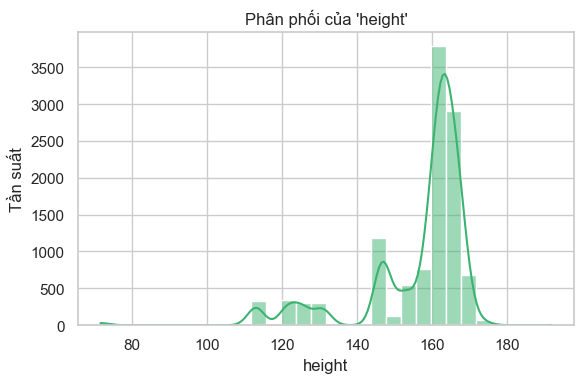

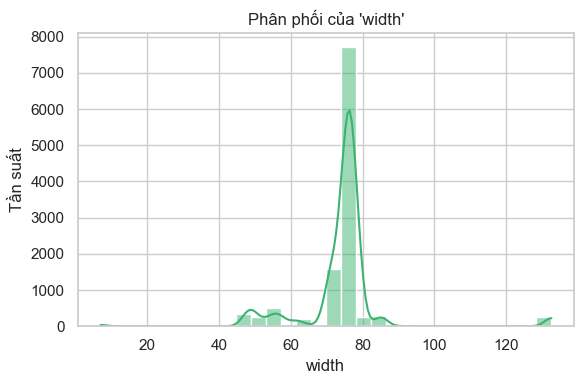

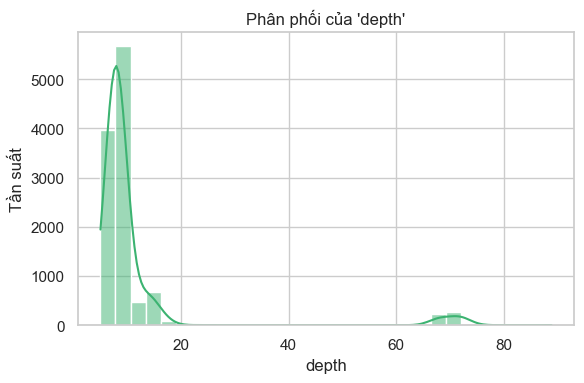

In [45]:
sns.set(style='whitegrid')

# Danh sách cột cần vẽ
columns = ['height', 'width', 'depth']

# Lặp và vẽ biểu đồ phân phối từng biến
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=30, color='mediumseagreen')
    plt.title(f"Phân phối của '{col}'")
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.tight_layout()
    plt.show()

Các trường hợp chưa đúng logic:
* Độ dày điện thoại trên 60mm là vô lý.
* Chiều rộng điện thoại trên 120mm hay dưới 30mm cũng vô lý.

Chuyển các thông số của các trường hợp này toàn bộ thành NaN vì vấn đề nằm ở một số mẫu điện thoại đã được trích xuất không đúng thông tin.

In [46]:
# Điều kiện phát hiện các giá trị bất hợp lý
condition = (data['depth'] > 60) | (data['width'] < 30) | (data['width'] > 120)

# Gán NaN cho cả 3 cột nếu dòng vi phạm điều kiện
data.loc[condition, ['height', 'width', 'depth']] = np.nan

In [47]:
# Lọc các dòng có NaN kích thước
mask = data[['height', 'width', 'depth']].isna().any(axis=1)

# Lấy cột 'name' và 'size' của những dòng này
result = data.loc[mask, ['name', 'size']].drop_duplicates()

# In kết quả
print(result)

                        name  \
49       apple iphone 13 pro   
82    samsung galaxy z fold6   
158               realme c53   
186         xiaomi redmi 14c   
324   samsung galaxy z flip6   
1705  samsung galaxy z fold6   

                                                   size  
49                                146,7 x 71.5 x 7,65mm  
82    Kích thước: 153.5 x 132.6 x 5.6 mmKích thước g...  
158                                191.9 x 88.9 x 91 mm  
186                         171,88mm x 77,80mm x 8,22mm  
324                           ['165.1', '85.1', '71.9']  
1705                         ['153.5', '132.6', '68.1']  


* apple iphone 13 pro, xiaomi redmi 14c không có vấn đề -> Gán lại như bình thường.
* các mẫu còn lại kiểm tra raw_data và bổ sung thủ công.

In [48]:
data.loc[data['name'] == 'apple iphone 13 pro', ['height', 'width', 'depth']] = [146.7, 71.5, 7.65]
data.loc[data['name'] == 'xiaomi redmi 14c', ['height', 'width', 'depth']] = [171.88, 77.80, 8.22]
data.loc[data['name'] == 'samsung galaxy z fold6', ['height', 'width', 'depth']] = [153.5, 132.6, 5.6]
data.loc[data['name'] == 'realme c53', ['height', 'width', 'depth']] = [167.3, 76.7, 7.49]
data.loc[data['name'] == 'samsung galaxy z flip6', ['height', 'width', 'depth']] = [165.1, 71.9, 6.9]

In [49]:
# Xóa cột size
data = data.drop(columns=['size'])

### Xử lý cột GPU

In [50]:
print(data['GPU'].unique())

['Apple GPU (5-core graphics)' 'GPU 5 nhân' 'Adreno 750'
 'Adreno 750 (1 GHz)' 'Apple GPU 5 nhân' 'GPU 5 lõi' 'Adreno 740'
 'Adreno 610' 'GPU 6 nhân mới' 'Apple GPU (4-core graphics)' '5‑core GPU'
 'GPU 6 lõi mới' '5 nhân GPU' 'GPU 4 nhân' 'Mali-G68 MP5' 'Mali-G57'
 'IMG BXM-8-256' 'GPU 5 lõi mới' 'Apple GPU 4 nhân'
 'AMD Ariel 2WGP-1RB 1.3 GHz' 'GPU Qualcomm® Adreno™' 'AMD Titan 1WGP'
 'Mali-G78 MP14' 'Xclipse 940' 'Xclipse 920' 'Adreno 830' 'Adreno 710'
 'Mali-G52' 'Adreno GPU' 'Mali-G57 MC2' 'Mali-G615' 'Mali-G68 MC4'
 'Adreno 730' 'Mali-G68' 'Adreno 660' 'Mali-G57 MC2 @950MHz'
 'IMG GE8320 @ 680 MHz' 'Unknown' 'IMG PowerVR GE8320' 'Mali-G52 MC2'
 'ARM Mali-G57' 'Arm® Mali-G615' 'Arm Mali-G615 MC6' 'Mali G52 MP2'
 'MT676  G52 MC2 @820MHz' 'Mali-G52 MP2' 'Adreno 644' 'Mali-G57 MP2'
 'Apple GPU 6 nhân' 'Adreno 619' 'Mali-G77 MC9' 'Immortalis-G715 MC11'
 'Adreno 720' 'Adreno 640' 'Mali-G615 MC2' 'ARM Immortalis-G720 MP12'
 'ARM Immortalis G925 MC12' 'Hãng không công bố']


Loại bỏ các thông tin không cần thiết, sửa lỗi chính tả, chỉ giữ lại tên chip GPU

In [51]:
# Xoá ký tự đặc biệt, chuẩn hoá khoảng trắng, xoá từ khoá mô tả
data['GPU'] = (data['GPU']
               .str.replace(r'[^\w\s\+\.\-]', ' ', regex=True)
               .str.replace(r'\s+', ' ', regex=True).str.strip()
               .str.replace(r'\b(Qualcomm|Graphics|đồ họa|mới|up to)\b', '', regex=True, flags=re.IGNORECASE)
               .str.strip())

# Đổi "core", "lõi" thành "nhân"
data['GPU'] = data['GPU'].str.replace(r'(\d+)\s*(?:lõi|core)s?\b', r'\1 nhân', regex=True, flags=re.IGNORECASE)

# Ghép từ tách rời và định dạng lại Adreno
data['GPU'] = (data['GPU']
               .str.replace(r'\b(Mali|G|MC|MP|Adreno|IMG|GE|Series|XT|Plus|Apple|PowerVR|Arm|ARM|Immortalis|Xclipse)\s+([A-Za-z0-9]+)', r'\1-\2', regex=True)
               .str.replace(r'\bAdreno(?:\s*\bGPU\b)?\s*(\d+)\b', r'Adreno-\1', regex=True, flags=re.IGNORECASE))

# Loại bỏ tần số MHz, GHz
data['GPU'] = data['GPU'].str.replace(r'\s*\d+\s*(mhz|ghz)', '', regex=True, flags=re.IGNORECASE).str.strip()

# Chuẩn hóa ARM Mali và sửa lỗi
data['GPU'] = (data['GPU']
               .str.replace(r'arm[-\s]*mali', 'ARM-Mali', regex=True, flags=re.IGNORECASE)
               .str.replace(r'\bMail\b', 'Mali', regex=True, flags=re.IGNORECASE)
               .str.replace(r'ARM[-\s]*Mail', 'ARM-Mali', regex=True, flags=re.IGNORECASE))

# Chuẩn hóa GPU không chuẩn
data.loc[data['GPU'].str.lower().str.contains('gpu adreno', na=False), 'GPU'] = 'Adreno-Unknown'
data.loc[data['GPU'].str.lower().str.contains('adreno gpu', na=False), 'GPU'] = 'Adreno-Unknown'

# Xử lý chuỗi GPU dạng "GPU X nhân"
for n in [4, 5, 6]:
    data.loc[data['GPU'].str.match(fr'gpu\s*{n}\s*nhân', na=False, case=False), 'GPU'] = f'Apple-GPU {n} nhân'

# Các chuỗi lộn xộn hoặc không phải GPU
non_gpu_patterns = ['SM-A146B', 'SM-A146P', 'Cortex', 'đang câ p nhâ t', 'hãng không công bố', 'unknown', 'amd', 'mt676']
pattern_no_gpu = '|'.join(non_gpu_patterns)
data.loc[data['GPU'].str.lower().str.contains(pattern_no_gpu, na=False), 'GPU'] = 'Unknown'

# Đồng nhất định dạng và gộp alias
data['GPU'] = data['GPU'].str.replace(r'ARM-Mali\s+', 'ARM-Mali-', regex=True)
alias_map = {'GPU 5 nhân': 'Apple-GPU 5 nhân', '5 nhân GPU': 'Apple-GPU 5 nhân', 'Apple-GPU 5-core': 'Apple-GPU 5 nhân',
             'Apple-GPU 4-core': 'Apple-GPU 4 nhân', 'Adreno-750 1 GHz': 'Adreno-750',
             'Mali-G57 MC2 950MHz': 'Mali-G57 MC2', 'IMG-GE8320 680 MHz': 'PowerVR-GE8320'}
data['GPU'] = data['GPU'].replace(alias_map)


In [52]:
print(data['GPU'].unique())

['Apple-GPU 5 nhân' 'Adreno-750' 'Adreno-740' 'Adreno-610'
 'Apple-GPU 6 nhân' 'Apple-GPU 4 nhân' 'Mali-G68 MP5' 'Mali-G57'
 'IMG-BXM-8-256' 'Unknown' 'GPU  Adreno' 'Mali-G78 MP14' 'Xclipse-940'
 'Xclipse-920' 'Adreno-830' 'Adreno-710' 'Mali-G52' 'Adreno-GPU'
 'Mali-G57 MC2' 'Mali-G615' 'Mali-G68 MC4' 'Adreno-730' 'Mali-G68'
 'Adreno-660' 'IMG-GE8320' 'IMG-PowerVR GE8320' 'Mali-G52 MC2'
 'ARM-Mali-G57' 'ARM-Mali-G615' 'ARM-Mali-G615 MC6' 'Mali-G52 MP2'
 'Adreno-644' 'Mali-G57 MP2' 'Adreno-619' 'Mali-G77 MC9'
 'Immortalis-G715 MC11' 'Adreno-720' 'Adreno-640' 'Mali-G615 MC2'
 'ARM-Immortalis-G720 MP12' 'ARM-Immortalis G925 MC12']


### Xử lý cột bluetooth

In [53]:
print(data['bluetooth'].unique())

['v5.3, A2DP, LE' 'v5.0' 'Bluetooth 5.3' '5.3' 'A2DP, LE, v5.3' 'v5.3'
 '5.3, A2DP, LE' '5.0' 'v5.0, A2DP, LE' '5.0, A2DP, LE' '5.2, A2DP, LE'
 'Có' 'v5.4' 'v5.2' 'v5.1' 'Bluetooth 6.0' 'Bluetooth v5.4'
 '5.2, A2DP, LE, aptX HD' 'Có 5.0, A2DP, LE' 'v5.1 BLE' '5.4'
 'Bluetooth\t5.0, BLE' '5.0, A2DP, LE, aptX HD' 'v5.3, LE, A2DP'
 'v5.2, LE, A2DP' 'v4.2' 'v5.0, A2DP' 'v2.1' 'v5.3, LE, apt-X, A2DP'
 'v5.0, LE, A2DP' 'v6.0']


Loại bỏ thông tin không cần thiết

In [54]:
# Chuẩn hóa chuỗi và sửa lỗi chính tả
data['processed_bluetooth'] = data['bluetooth'].fillna('').astype(str)

data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'(\d+),(\d+)', r'\1.\2', regex=True)
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\bv\s*(\d+\.\d+)', r'v\1', regex=True, flags=re.IGNORECASE).str.strip() 
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'(?<!Dual[\s\-])\bBluetooth\b\s*', '', regex=True).str.strip() 
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\baptX\b', 'apt-X', regex=True, flags=re.IGNORECASE).str.strip()
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\bBT\s*(\d+\.\d+.*)?\b', r'\1', regex=True, flags=re.IGNORECASE).str.strip() 
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'(?<!v)(\b\d+\.\d+(?:\s*[a-zA-Z0-9]+)?\b)', r'v\1', regex=True, flags=re.IGNORECASE).str.strip()
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\b(Có)\b(?!$)', '', regex=True).str.strip() 
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r',\s*', ', ', regex=True)


data['processed_bluetooth'] = data['processed_bluetooth'].replace({
    'v 52': 'v5.2',         
    'A2DPLEv5.2': 'A2DP, LE, v5.2',  
    'A2DP, LE5.2, A2DP, LE': 'A2DP, LE, v5.2, A2DP, LE', 
    'Có': np.nan,         
    'v 52': 'v5.2',        
})

data['bluetooth'] = data['processed_bluetooth'].replace('', np.nan)

data = data.drop(columns=['processed_bluetooth'], errors='ignore')

In [55]:
print(data['bluetooth'].unique())

['v5.3, A2DP, LE' 'v5.0' 'v5.3' 'A2DP, LE, v5.3' 'v5.0, A2DP, LE'
 'v5.2, A2DP, LE' nan 'v5.4' 'v5.2' 'v5.1' 'v6.0'
 'v5.2, A2DP, LE, apt-X HD' 'v5.1 BLE' 'v5.0, BLE'
 'v5.0, A2DP, LE, apt-X HD' 'v5.3, LE, A2DP' 'v5.2, LE, A2DP' 'v4.2'
 'v5.0, A2DP' 'v2.1' 'v5.3, LE, apt-X, A2DP' 'v5.0, LE, A2DP']


### Xử lý cột refresh_rate

In [56]:
print(data['refresh_rate'].unique())

['120Hz' '60Hz' 'Tần số quét 120 Hz' '90Hz' 'Tần số quét 60 Hz'
 'Tần số quét 90 Hz' '60' 'Tần số quét Chính: 120 Hz & Phụ: 60 Hz'
 'Tần số quét 144 Hz' '30']


Lấy thông tin tần số quét chính, loại bỏ chữ Hz

In [57]:
# Chuẩn hóa cột refresh_rate (chữ thường, loại bỏ các từ không cần thiết)
data['refresh_rate_cleaned'] = data['refresh_rate'].astype(str).str.lower()
data['refresh_rate_cleaned'] = data['refresh_rate_cleaned'].str.replace(r'tần số quét|hz|từ|trở lên|nan|\(.*\)|@\d+p|phụ:', '', regex=True)
data['refresh_rate_cleaned'] = data['refresh_rate_cleaned'].str.replace(r'&|\s*-\s*', ' ', regex=True)
data['refresh_rate_cleaned'] = data['refresh_rate_cleaned'].str.strip()

# Gán các giá trị về nan
data['refresh_rate'] = np.nan

# Xử lý các trường hợp có phân chia tần số quét chính/phụ
main_hz_extracted = data['refresh_rate_cleaned'].str.extract(r'chính:\s*(\d+)')[0]
main_hz_numeric = pd.to_numeric(main_hz_extracted, errors='coerce')
data['refresh_rate'] = main_hz_numeric.fillna(data['refresh_rate'])

# Xử lý các trường hợp còn lại (chưa được điền)
remaining_hz_extracted = data['refresh_rate_cleaned'].str.extract(r'(\d+)')[0]
remaining_hz_numeric = pd.to_numeric(remaining_hz_extracted, errors='coerce')
data['refresh_rate'] = data['refresh_rate'].fillna(remaining_hz_numeric)

data = data.drop(columns=['refresh_rate_cleaned'], errors='ignore')

### Xử lí ngoại lai logic

In [58]:
# Giá cũ phải nhỏ hơn hoặc bằng giá mới
data = data[data['price_old'] <= data['price_new']]

# Lưu dữ liệu đã qua xử lí

In [59]:
# Xóa các dòng trùng lặp
data = data.drop_duplicates(keep=False)
# Kiểm tra lại kích thước
data.shape

(11372, 26)

In [60]:
# Xuất DataFrame ra file CSV
data.to_csv('tidy_data.csv', index=False, encoding='utf-8-sig')